In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from el_farol.model import ElFarolBar

In [2]:
memory_sizes = [5, 10, 20]
crowd_threshold = 60
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, memory_size=m)
    for m in memory_sizes
]
for model in models:
    for i in range(100):
        model.step()

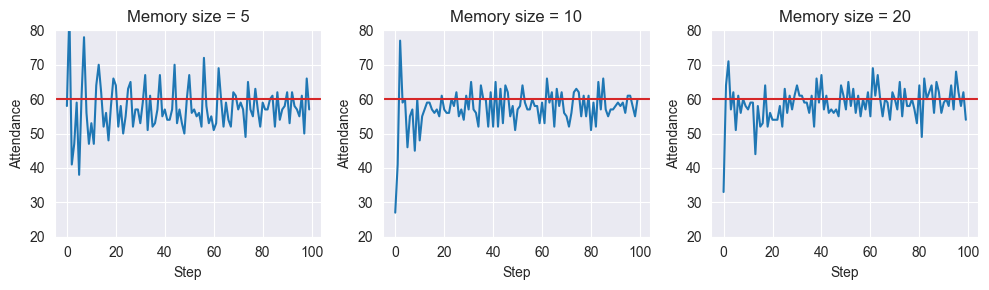

In [3]:
# You should observe that the attendance converges to 60.
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, model in enumerate(models):
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Step",
        ylabel="Attendance",
        title=f"Memory size = {memory_sizes[idx]}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()

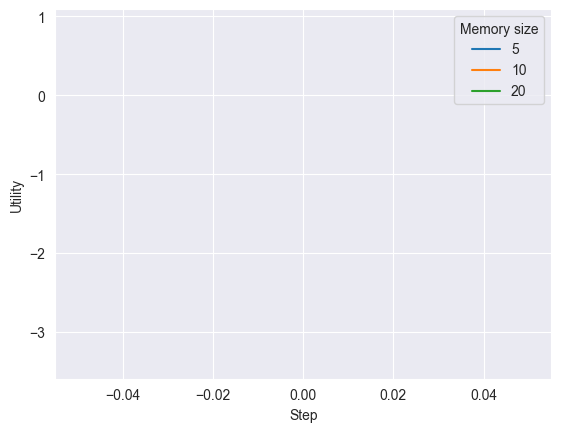

In [4]:
for idx, memory_size in enumerate(memory_sizes):
    model = models[idx]
    df = model.datacollector.get_agent_vars_dataframe()
    sns.lineplot(
        x=df.index.levels[0],
        y=df.Utility.groupby("Step").mean(),
        label=str(memory_size),
    )
plt.legend(title="Memory size");

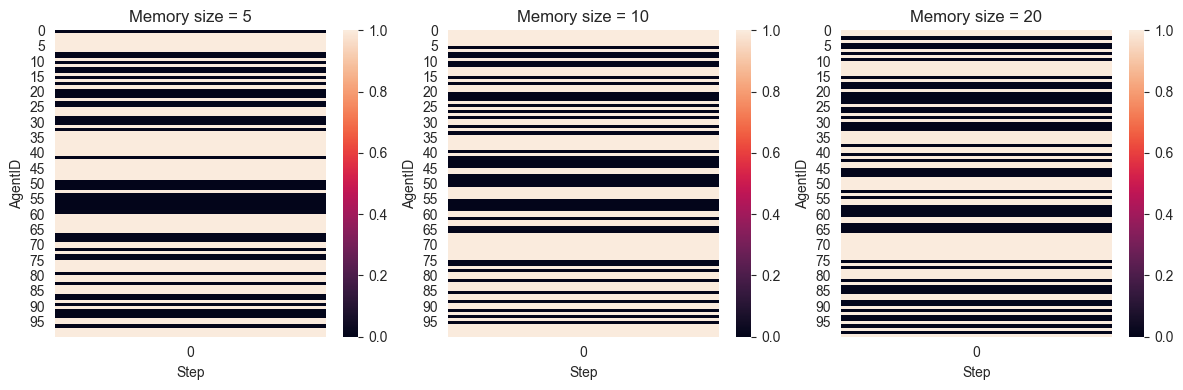

In [5]:
# Decisions made on across trials
fix, axs = plt.subplots(1, 3, figsize=(12, 4))
for idx, memory_size in enumerate(memory_sizes):
    plt.sca(axs[idx])
    df = models[idx].datacollector.get_agent_vars_dataframe()
    df.reset_index(inplace=True)
    ax = sns.heatmap(df.pivot(index="AgentID", columns="Step", values="Attendance"))
    ax.set(title=f"Memory size = {memory_size}")
    plt.tight_layout()

In [6]:
# Next, we experiment with varying the number of strategies
num_strategies_list = [5, 10, 20]
crowd_threshold = 60
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, num_strategies=ns)
    for ns in num_strategies_list
]
for model in models:
    for i in range(100):
        model.step()

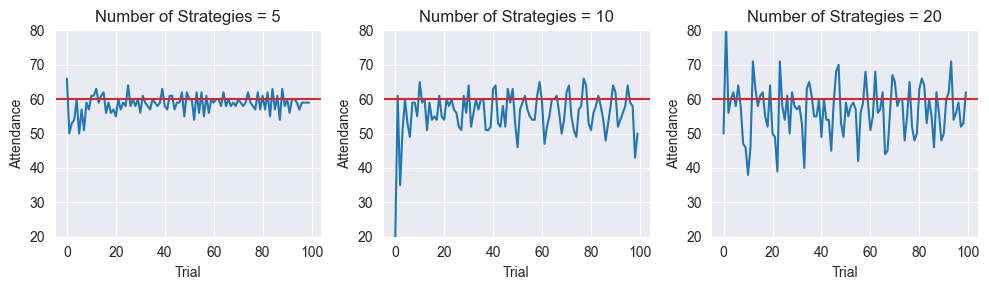

In [7]:
# Attendance of the bar based on the number of strategies
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, num_strategies in enumerate(num_strategies_list):
    model = models[idx]
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Trial",
        ylabel="Attendance",
        title=f"Number of Strategies = {num_strategies}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()

In [ ]:
# ### Experiment: Effect of Memory Size on Attendance
# In this section, we analyze how varying the memory size affects attendance trends
# and agent utility in the El Farol Bar model.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from el_farol.model import ElFarolBar

# #### Setup: Initialize Models with Varying Memory Sizes
# We test memory sizes of 5, 10, and 20, with a fixed crowd threshold of 60.

In [10]:
memory_sizes = [5, 10, 20]
crowd_threshold = 60
bias_factor = 5  # Introduce a bias factor
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, memory_size=m, bias_factor=bias_factor)
    for m in memory_sizes
]
for model in models:
    for i in range(100):
        model.step()

TypeError: __init__() got an unexpected keyword argument 'bias_factor'

# #### Plot Attendance Across Memory Sizes
# We visualize the attendance over 100 steps for each memory size.

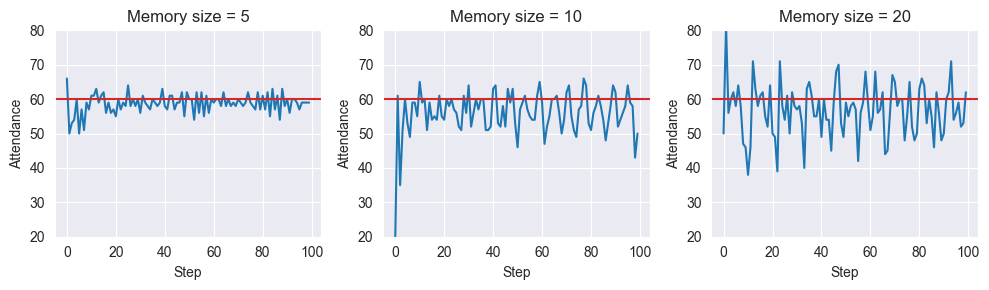

In [11]:
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, model in enumerate(models):
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Step",
        ylabel="Attendance",
        title=f"Memory size = {memory_sizes[idx]}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()

# #### Analyze Utility Trends Across Memory Sizes
# Plot mean utility for agents over simulation steps.

Text(0.5, 1.0, 'Utility Comparison Across Memory Sizes')

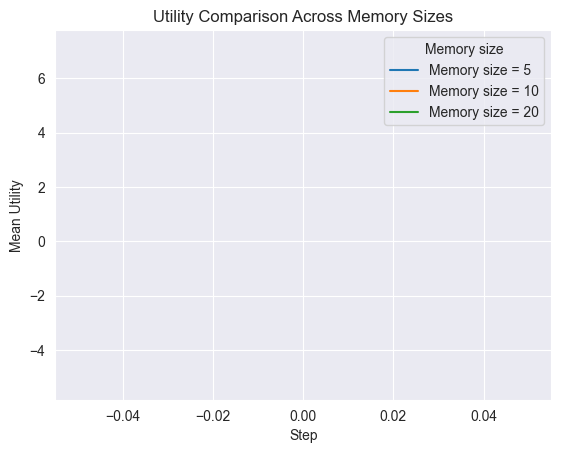

In [12]:
for idx, memory_size in enumerate(memory_sizes):
    model = models[idx]
    df = model.datacollector.get_agent_vars_dataframe()
    sns.lineplot(
        x=df.index.levels[0],
        y=df.Utility.groupby("Step").mean(),
        label=f"Memory size = {memory_size}",
    )
plt.legend(title="Memory size")
plt.xlabel("Step")
plt.ylabel("Mean Utility")
plt.title("Utility Comparison Across Memory Sizes")

# #### Heatmap of Agent Decisions
# We visualize attendance decisions across steps for each agent.

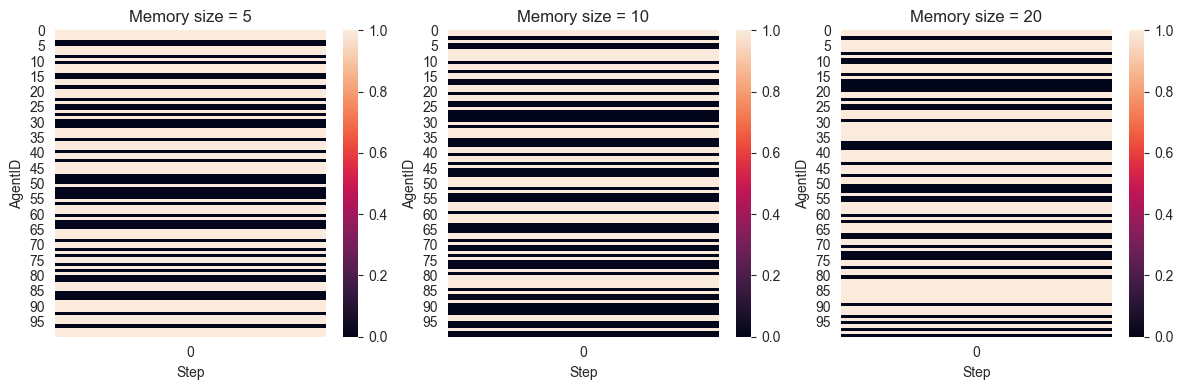

In [13]:
fix, axs = plt.subplots(1, 3, figsize=(12, 4))
for idx, memory_size in enumerate(memory_sizes):
    plt.sca(axs[idx])
    df = models[idx].datacollector.get_agent_vars_dataframe()
    df.reset_index(inplace=True)
    ax = sns.heatmap(df.pivot(index="AgentID", columns="Step", values="Attendance"))
    ax.set(title=f"Memory size = {memory_size}")
    plt.tight_layout()

# ### Experiment: Effect of Number of Strategies on Attendance
# In this section, we analyze how varying the number of strategies affects
# attendance and agent utility in the model.

In [14]:
num_strategies_list = [5, 10, 20]
bias_factor = -5  # Adjust bias factor to observe its effect
models = [
    ElFarolBar(N=100, crowd_threshold=crowd_threshold, num_strategies=ns, bias_factor=bias_factor)
    for ns in num_strategies_list
]
for model in models:
    for i in range(100):
        model.step()

TypeError: __init__() got an unexpected keyword argument 'bias_factor'

# #### Plot Attendance Across Number of Strategies
# Visualize the attendance for different numbers of strategies over 100 steps.

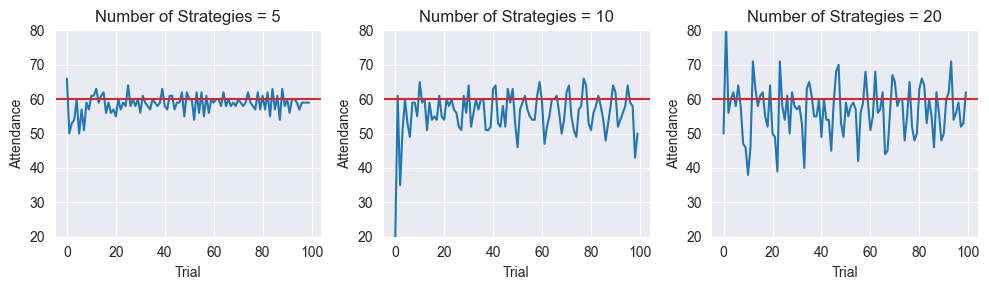

In [15]:
_, axs = plt.subplots(1, 3, figsize=(10, 3))
for idx, num_strategies in enumerate(num_strategies_list):
    model = models[idx]
    ax = axs[idx]
    plt.sca(ax)
    df = model.datacollector.get_model_vars_dataframe()
    sns.lineplot(data=df, x=df.index, y="Customers", ax=ax)
    ax.set(
        xlabel="Trial",
        ylabel="Attendance",
        title=f"Number of Strategies = {num_strategies}",
        ylim=(20, 80),
    )
    plt.axhline(crowd_threshold, color="tab:red")
    plt.tight_layout()

# #### Analyze Utility Trends Across Strategies
# Plot mean utility for agents with different numbers of strategies.


Text(0.5, 1.0, 'Utility Comparison Across Strategies')

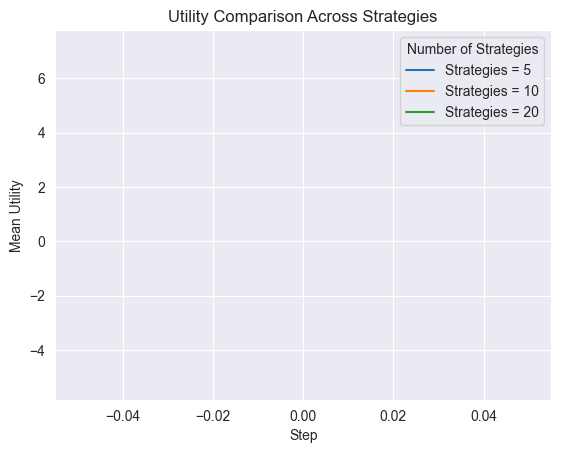

In [16]:
for idx, num_strategies in enumerate(num_strategies_list):
    model = models[idx]
    df = model.datacollector.get_agent_vars_dataframe()
    sns.lineplot(
        x=df.index.levels[0],
        y=df.Utility.groupby("Step").mean(),
        label=f"Strategies = {num_strategies}",
    )
plt.legend(title="Number of Strategies")
plt.xlabel("Step")
plt.ylabel("Mean Utility")
plt.title("Utility Comparison Across Strategies")